# Trabajo Práctico Semanal 3
Teoria de circuitos II

### Sandomir L Uriel

#### Se requiere diseñar un filtro activo siguendo las condiciones impuestas en la siguiente plantilla de diseño:

<img src="https://lh4.googleusercontent.com/XOqqhroVf96ibPqJTyJ37P_Wq94IkOyrOWdY_7CjfPthd5mH9_xfScQhuh4iG6xTIsV5pDZ3F7wKN2L7Y5VB9K2AsTYTBJlaCacWm4FcwQ3OZtXSvuDWd6XGvBqhOG3LGcWM9V3JxnpHis7ddA"/>

Con:
$\alpha_{min} = 35 dB, \alpha_{max} = 1 dB, f_s = 1000Hz, f_p = 3500Hz$

<br>
Podemos identificar mirando la plantilla que se trata de un Filtro Pasa-Altos. Este mismo se puede normalizar y transformar en un Filtro Pasa-Bajos reemplazando la variable independiente $\omega$ por $\Omega = \frac{1}{\omega}$ del eje de abscisas:
<br>
<img src="https://i.gyazo.com/5f839288563811e8780bd9545b6230fa.png"/>
<br>
Planteamos a $\alpha_{max}$ segun la funcion de transferencia de un filtro de Maxima Planicidad y ya que tenemos nuestra frecuencia de paso normalizada, podemos despejar $\xi^2$ y obtener su valor:
<br>
<img src="https://i.gyazo.com/aa24080ed000de7fea2c544a6c9882fe.png"/>
<br>
Ahora planteando la misma ecuacion pero para $\alpha_{min}$, podemos iterar con distintos valores de N hasta lograr la atenuacion solicitada:
<br>
<img src="https://i.gyazo.com/418c0492b014bee355d186b348a08886.png"/>
<br>
Renormalizamos para poder trabajar nuestra función transferencia de Maxima Planicidad como Butterworth con la norma: $\omega_B = \frac{\omega}{\omega_s} \xi^{1/n}$
<br>
Obteniendo:
$|T_L(\omega)|^2 = \frac{1}{1+\omega_B^{2n}}$
<br>
Ahora, podemos separar nuestra función de orden 4 en otras 2 funciones de orden 2 del tipo Butterworth:
<br>
$T_{L}(s) = T_{B2_a} . T_{B2_b}$
<br><br>
Para lograr la funcion de orden 4, ubicamos 2 pares de polos compuestos conjugados sobre la circunferencia unitaria en el semiplano izquierdo, quedandonos con 2 polos a $\frac{\pi}{8}$ del eje $\sigma$ y otros 2 polos a $\frac{3\pi}{8}$
Por lo que nuestras funciones de transferencia Butterworth nos quedaran:
$T_{L}(s) = \frac{1}{s^2 + s . 2 cos\phi_1 + 1} . \frac{1}{s^2 + s . 2 cos\phi_1 + 1} = \frac{1}{s^2 + s . 2 cos(\frac{\pi}{8}) + 1} . \frac{1}{s^2 + s . 2 cos(\frac{3\pi}{8}) + 1}$
<br>
$T_{L}(s) = \frac{1}{s^2 + s . 1,8478 + 1} . \frac{1}{s^2 + s . 0,7654 + 1} = \frac{1}{s^4 + s^3.2,6132 + s^2.3,4143 + s.2,6132 + 1}$
<br>
<br>Transformando nuevamente en un Filtro Pasa-Altos:
<br>
$T_{H}(s) = \frac{s^2}{s^2 + s . 1,8478 + 1} . \frac{s^2}{s^2 + s . 0,7654 + 1} = \frac{s^4}{s^4 + s^3.2,6132 + s^2.3,4143 + s.2,6132 + 1}$
<br><br>Notese que colocamos los polos simulando que estamos sobre el radio unitario, pero solo es asi mientras estemos con la frecuencia de Butterworth normalizada.
<br>
Obtenemos entonces 4 ceros en el origen y raices en:

In [19]:
import numpy as np
raicesA = np.roots([1,1.8478,1])
raicesB = np.roots([1,.7654,1])
raicesA, raicesB

(array([-0.9239+0.38263402j, -0.9239-0.38263402j]),
 array([-0.3827+0.92387267j, -0.3827-0.92387267j]))

$S_{a1}= -0.9239 + i 0.3826$ <br> $S_{a2}= -0.9239 - i 0.3826$ <br> $S_{b1}= -0.3827 + i 0.9239$ <br> $S_{b2}= -0.3827 - i 0.9239$
<br><br>
##### Respuesta en frecuencia y diagrama de polos y ceros:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

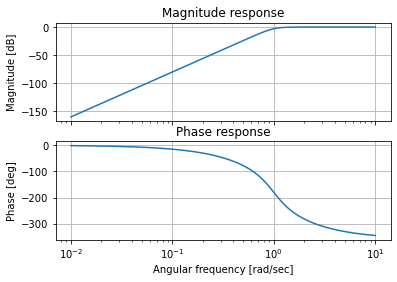

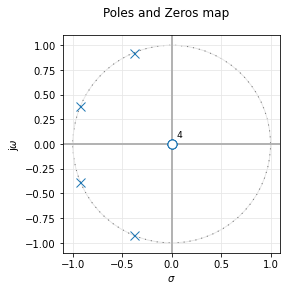

In [28]:
import scipy.signal as signal
import splane

num = [1,0,0,0,0]
den = [1, 2.6132, 3.4143, 2.6132, 1]
filtro = signal.TransferFunction(num, den)
splane.bodePlot(filtro)
splane.pzmap(filtro)

###### Circuito pasivo 

Si queremos implementar un circuito con estructuras pasivas para lograr el mismo comportamiento que con nuestra funcion Pasa-Altos, podemos hacerlo de esta manera:

<img src="https://i.gyazo.com/4332792cc52b3413dd97ec6eb607a9a7.png" />

Donde para esa estructura RLC, obtenemos ecuaciones de la forma:
<br>$\omega_0^2 = 1  =>  L = \frac{1}{C}$
<br>$\frac{\omega_0}{Q} = \frac{R}{L}$, Si $R = 1 => L = Q, C = \frac{1}{Q}$ 
<br><br><br>
Para nuestro caso tenemos:
<br>$Q_1 = 1.8478$ <br> $Q_2 = 0.7654$
<br>$R_1 = R_2 = 1$ 
<br>$L_1 = Q_1 = 1.8478$   ,    $L_2 = Q_2 = 0.7654$
<br>$C_1 = \frac{1}{Q_1} = 0.533$   ,    $C_2 = \frac{1}{Q_2} = 1.306$

##### Desnormalizacion de los componentes

Tenemos como condicion, utilizar una norma de impedancia $\Omega_z = 1K$, mientras que por el procedimiento utilizado, normalizamos con la frecuencia de Butterworth: $ \Omega_{\omega_B} = \omega_p .   \xi^{{\frac{1}{n}}} = 18573$
<br>
Desnormalizando los componentes obtenemos:
<br>
$R_1 = R_2 = 1 . 1K\Omega = 1K\Omega$ 
<br><br>
$L_1 = Q_1 . \Omega_Z . \frac{1}{\Omega_{\omega_B}} = 1.8478 . 1000 . \frac{1}{18573} Hy = 99.5 mHy$
<br><br>
$C_1 = \frac{1}{Q_1} . \frac{1}{\Omega_Z} . \frac{1}{\Omega_{\omega_B}} = \frac{1}{1.8478} . \frac{1}{1000} . \frac{1}{18573} = 100.9 nF$
<br><br>
$L_2 = Q_2 . \Omega_Z . \frac{1}{\Omega_{\omega_B}} = 0.7654 . 1000 . \frac{1}{18573} Hy = 41.21 mHy$
<br><br>
$C_2 = \frac{1}{Q_2} . \frac{1}{\Omega_Z} . \frac{1}{\Omega_{\omega_B}} = \frac{1}{0.7654} . \frac{1}{1000} . \frac{1}{18573} = 70.34 nF$
<br><br>
Tenemos entonces un circuito como el siguiente:
<br><img src="https://i.gyazo.com/7f32c3aef2136bfc043fd30cdc69be99.png"/>

Ahora buscamos activar las bobinas, podemos hacerlo de la siguiente manera:

<img src="https://i.gyazo.com/ab03b44cbc11f010d7cdd7e3ceb9862c.png"/>

<br>

##### Simulacion circuital: 

<img src="https://i.gyazo.com/8ef0f41095302cb11e7e937b41cff05f.png"/>
<br>
Donde podemos observar que para $f_s = 1000Hz$ tenemos una atenuacion de 38.48dB, y en $f_p = 3500Hz$ una amplificacion de 4.16dB, por lo que podemos considerar a la consigna cumplida.